# Does Bobby Always Win on "Beat Bobby Flay?"

Well, no, not exactly. Bobby is good. But he's not that good. Beating Bobby is still quite the accomplishment though. Let's dive into some fun insights from the show.

__Load Libraries__

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import random
import wordcloud

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

%matplotlib inline

__Load Data File__

In [2]:
bbf_df = pd.read_csv("Data/Beat_Bobby_Flay_Wikipedia_Data.csv", engine = "python")

In [3]:
bbf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 11 columns):
SeriesEpisodeNumber      297 non-null int64
Season                   297 non-null int64
SeasonEpisodeNumber      297 non-null int64
Title                    297 non-null object
OriginalAirdate          297 non-null object
Guests                   297 non-null object
FirstRoundIngredient     297 non-null object
FirstRoundContestants    297 non-null object
SecondRoundJudges        297 non-null object
SecondRoundDish          297 non-null object
SecondRoundWinner        297 non-null object
dtypes: int64(3), object(8)
memory usage: 25.6+ KB


## What dishes does Bobby most often win at?

In [4]:
# create indicator for episodes where Bobby has won
bbf_df["Bobby Dominates"] = np.where(bbf_df["SecondRoundWinner"] == "Bobby Flay", 1, 0)

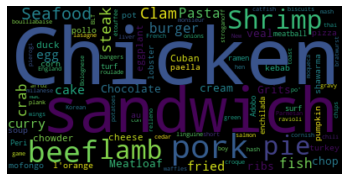

In [5]:
# subset to the contests Bobby won
winning_dishes = bbf_df.loc[bbf_df["Bobby Dominates"] == 1]

# get the dishes column
winning_dishes = winning_dishes[["SecondRoundDish"]]

# get all dishes into a string of text
text = " ".join(dish for dish in winning_dishes.SecondRoundDish)

# Create and generate a word cloud image:
wc = wordcloud.WordCloud(max_font_size = 100, max_words = 100, background_color = "black").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## What dishes does Bobby most often lose at?

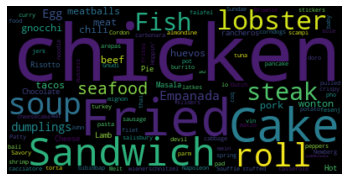

In [6]:
# subset to the contests Bobby lost
winning_dishes = bbf_df.loc[bbf_df["Bobby Dominates"] == 0]

# get the dishes column
winning_dishes = winning_dishes[["SecondRoundDish"]]

# get all dishes into a string of text
text = " ".join(dish for dish in winning_dishes.SecondRoundDish)

# Create and generate a word cloud image:
wc = wordcloud.WordCloud(max_font_size = 100, max_words = 100, background_color = "black").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

As "chicken" and "sandwich" seem to be dishes that are commonly made in the Second Round, it's tough to make a decisive opinion on what Bobby is really good or bad at cooking. A few things that stick out are that in the WordCloud of dishes Bobby has won, he is good at cooking beef and pork, and in the WordCloud of dishes Bobby has lost, he is not good at baking (i.e. cake).

## What is Bobby's overall record?

186 - 111. 

63% of the time, Bobby wins. Honestly this is lower than I thought, but still very impressive.

In [29]:
# create indicator for episodes where Bobby has won
bbf_df["Bobby Dominates "] = np.where(bbf_df["SecondRoundWinner"] == "Bobby Flay", "Yes", "No")

# group by the indicator
overall_record = bbf_df.groupby("Bobby Dominates ").agg({"Bobby Dominates":["count"]})

# exclude first level of multi-indexed columns resulting from the groupby
overall_record.columns = overall_record.columns.droplevel(0)

# rename the column
overall_record.columns = ["Results"]

# show results
overall_record

,Results
Bobby Dominates,
No,111
Yes,186


In [30]:
print("Bobby's winning percentage: ", 
      (overall_record.iloc[1,0] / (overall_record.iloc[0,0] + overall_record.iloc[1,0])).round(2)*100, "%")

Bobby's winning percentage:  63.0 %


## How has Bobby done over time?

Bobby has only had three losing seasons, and one .500 season.

Simply put, Bobby dominates. 

Text(0.5, 1.0, 'Bobby Wins Most Episodes Most Seasons')

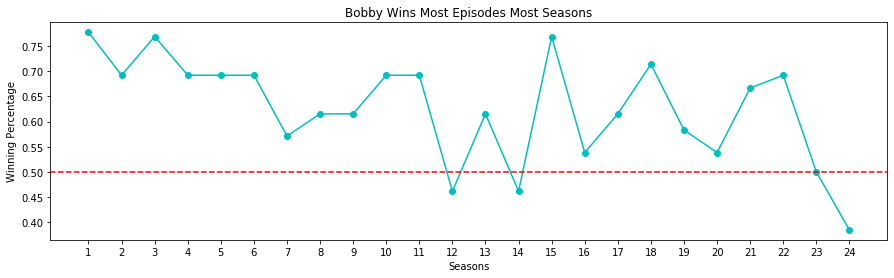

In [9]:
# get results by season
seasonal_record = bbf_df.groupby(["Season"]).agg({"Bobby Dominates":["mean"]}).round(4)

# reset the index
seasonal_record.reset_index(inplace = True)

# plot line graph
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(111)

ax1.plot(seasonal_record["Season"], seasonal_record[("Bobby Dominates", "mean")],
         color = "c",
         marker = "o")
ax1.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.xticks(seasonal_record["Season"])
plt.xlabel("Seasons")
plt.ylabel("Winning Percentage")
plt.title("Bobby Wins Most Episodes Most Seasons")

## Which Guest has appeared on the show the most?

Alex Guarnaschelli appears the most on the show.

In [10]:
# split the Guests column into separate columns for every guest
guests_df = pd.concat([bbf_df["Guests"], bbf_df["Guests"].str.split(',', expand = True)], axis = 1)

# rename columns
guests_df.columns = ["Guests","Guest1","Guest2","Guest3"]

# stack guests 
guests_series = pd.concat([guests_df["Guest1"], 
                           guests_df["Guest2"], 
                           guests_df["Guest3"]],
                          axis = 0).dropna() # axis = 0 for rows

# strip whitespace so to not capture duplicates
guests_series = guests_series.str.strip()

# create dataframe
guests_df = pd.DataFrame({'Guests':guests_series})

# group by Guest and count
guests_df_grp = guests_df.groupby("Guests").agg({"Guests":["count"]})

# exclude first level of multi-indexed columns resulting from the groupby
guests_df_grp.columns = guests_df_grp.columns.droplevel(0)

# sort values
guests_df_grp = guests_df_grp.sort_values("count", ascending = False).reset_index()

# rename the columns
guests_df_grp.columns = ["Guest", "Appearances"]

# specify top quantile (0 to 1)
quant = guests_df_grp.quantile(0.95)

# show which Guests have made the most appearances
guests_df_grp.loc[guests_df_grp["Appearances"] >= quant[0], :]

,Guest,Appearances
0,Alex Guarnaschelli,45
1,Scott Conant,36
2,Anne Burrell,35
3,Katie Lee,35
4,Sunny Anderson,34
5,Michael Symon,30
6,Geoffrey Zakarian,23
7,Ted Allen,19
8,Amanda Freitag,14
9,Giada De Laurentiis,14


## What is the record of a Guest?

This has nothing to do with who beats Bobby or how to beat Bobby, but the Guests joke about beating Bobby because their choice of contestant beats Bobby.

Only 25 Guests have appeared five or more times on the show. Of these Guests, Valerie Bertinelli has the best winning percentage against Bobby. Valeria and Giada are the only ones with winning records. 

Looks like Bobby really wants Marc Murphy and Debi Mazar to be Guests on the show.

In [11]:
# create indicator for Guests winning
bbf_df["GuestsDominate"] = np.where(bbf_df["SecondRoundWinner"] == "Bobby Flay", 0, 1)

# split the Guests column into separate columns for every guest
guests_record_df = pd.concat([bbf_df["Guests"], bbf_df["Guests"].str.split(',', expand = True)], axis = 1)

# rename columns
guests_record_df.columns = ["Guests","Guest1","Guest2","Guest3"]

# bind columns together
guests_record_df = pd.concat([guests_record_df, bbf_df["GuestsDominate"]], axis = 1)

# get Guest1 and GuestsDominate indicator
guest1_df = guests_record_df.loc[:, ["Guest1", "GuestsDominate"]]

# get Guest2 and GuestsDominate indicator
guest2_df = guests_record_df.loc[:, ["Guest2", "GuestsDominate"]]

# get Guest3 and GuestsDominate indicator
guest3_df = guests_record_df.loc[:, ["Guest3", "GuestsDominate"]]

# rename columns so they could be stacked
guest1_df.columns = ["Guest","GuestsDominate"]
guest2_df.columns = ["Guest","GuestsDominate"]
guest3_df.columns = ["Guest","GuestsDominate"]

# stack guests 
guests_record_df = pd.concat([guest1_df, 
                              guest2_df, 
                              guest3_df],
                             axis = 0).dropna() # axis = 0 for rows

# strip whitespace so to not capture duplicates
guests_record_df["Guest"] = guests_record_df["Guest"].str.strip()

# group by Guest and count
guests_record_grp = guests_record_df.groupby("Guest").agg({"Guest":["count"], "GuestsDominate":["mean"]})

# exclude first level of multi-indexed columns resulting from the groupby
guests_record_grp.columns = guests_record_grp.columns.droplevel(0)

# rename the columns
guests_record_grp.columns = ["Appearances", "Guest's Winning %"]

# show the top winning percentages for Guests who have appeared at least five times
(guests_record_grp.loc[guests_record_grp["Appearances"] >= 5, :]
 .sort_values("Guest's Winning %", ascending = False)
 .reset_index())

,Guest,Appearances,Guest's Winning %
0,Valerie Bertinelli,5,0.600000
1,Giada De Laurentiis,14,0.571429
2,Sunny Anderson,34,0.470588
3,Damaris Phillips,11,0.454545
4,Michael Voltaggio,11,0.454545
5,Jeff Mauro,7,0.428571
6,Alex Guarnaschelli,45,0.422222
7,Ted Allen,19,0.421053
8,Carla Hall,10,0.400000
9,Michael Symon,30,0.400000


## What is Bobby's record against other Food Network personalities?

Bobby has not beat a Guest/Food Network Personality.

That may sound shocking, however, contestants get to pick what he/she and Bobby get to cook in the second round. Realistically, Bobby doesn't have a chance at winning against other world-renowned chefs and his/her respective world-renowned dishes. 

In [26]:
# split the Guests column into separate columns for every guest
guest_personalities_df = pd.concat([bbf_df["Guests"],
                                    bbf_df["Guests"].str.split(',', expand = True)],
                                   axis = 1) # axis = 1 for column bind

# rename columns
guest_personalities_df.columns = ["Guests","Guest1","Guest2","Guest3"]

# identify which episodes Bobby faces an Food Network Personality
# to identify Food Network Personality, two Guests compete in the first round and there is one Guest as the host
# the losing contestant then co-hosts/becomes a Guest on the show for the second round
guest_personalities_df["Bobby Faces Personality"] = np.where(guest_personalities_df["Guest2"].isnull(), "Yes", "No")

# bind columns together
guest_personalities_df = pd.concat([guest_personalities_df, 
                                    bbf_df["Bobby Dominates"],
                                    bbf_df["SecondRoundWinner"]],
                                   axis = 1)

# group by Food Network Personalities
guest_personalities_grp = guest_personalities_df.groupby("Bobby Faces Personality").agg({"Bobby Dominates":"mean"})

# rename columns
guest_personalities_grp.columns = ["Bobby's Winning %"]

# # show resulting table
guest_personalities_grp

,Bobby's Winning %
Bobby Faces Personality,
No,0.641379
Yes,0.000000


In [28]:
# identify Food Network Personalities who have beaten Bobby
chefs = guest_personalities_df.loc[guest_personalities_df["Bobby Faces Personality"] == "Yes",
                                   ["SecondRoundWinner","Bobby Dominates"]]

# rename columns
chefs.columns = ["Second Round Winner", "Bobby Dominates"]

# show results
chefs

,Second Round Winner,Bobby Dominates
81,Alex Guarnaschelli,0
94,Anne Burrell,0
139,Alex Guarnaschelli,0
140,Damaris Phillips,0
141,Marcus Samuelsson,0
142,Amanda Freitag,0
296,Buddy Valastro,0


Looks like these chefs have Bobby's number. 

## Who are the chefs that have beat Bobby multiple times?

Alex Guarnaschelli is the only chef to defeat Bobby TWICE!

In [23]:
# get wins by contestant
mult_winner_grp = bbf_df.groupby("SecondRoundWinner").agg({"GuestsDominate":["sum"]})

# exclude first level of multi-indexed columns resulting from the groupby
mult_winner_grp.columns = mult_winner_grp.columns.droplevel(0)

# rename columns
mult_winner_grp.columns = ["Wins"]

# show the contestants who have at least two wins
mult_winner_grp = (mult_winner_grp.loc[mult_winner_grp["Wins"] > 1, :]
                   .sort_values("Wins", ascending = False)
                   .reset_index())
# rename columns
mult_winner_grp.columns = ["Second Round Winner", "Wins"]

# show results
mult_winner_grp

,Second Round Winner,Wins
0,Alex Guarnaschelli,2


## Which Judge has appeared on the show the most?

Frank Prisinzano has appeared the most as a judge. 

In [15]:
# split the Judges column into separate columns for every judge
judges_df = pd.concat([bbf_df["SecondRoundJudges"], 
                       bbf_df["SecondRoundJudges"].str.split(',', expand = True)], axis = 1)

# rename columns
judges_df.columns = ["Judges","Judge1","Judge2","Judge3"]

# stack judges
judges_series = pd.concat([judges_df["Judge1"], 
                           judges_df["Judge2"], 
                           judges_df["Judge3"]],
                          axis = 0).dropna() # axis = 0 for rows

# strip whitespace so to not capture duplicates
judges_series = judges_series.str.strip()

# create dataframe
judges_df = pd.DataFrame({'Judges': judges_series})

# group by Judges and count
judges_df_grp = judges_df.groupby("Judges").agg({"Judges":["count"]})

# exclude first level of multi-indexed columns resulting from the groupby
judges_df_grp.columns = judges_df_grp.columns.droplevel(0)

# sort values
judges_df_grp = judges_df_grp.sort_values("count", ascending = False).reset_index()

# rename columns
judges_df_grp.columns = ["Judge","Appearances"]

# specify top quantile (0 to 1)
quant = judges_df_grp.quantile(0.95)

# show which Judges have made the most appearances
judges_df_grp.loc[judges_df_grp["Appearances"] >= quant[0], :]

,Judge,Appearances
0,Frank Prisinzano,17
1,Leah Cohen,16
2,Michael Psilakis,16
3,Madison Cowan,15
4,Lourdes Castro,14
5,Ivy Stark,14
6,Hugh Mangum,13
7,Michael Lomonaco,13
8,Ed McFarland,12
9,Tricia Williams,11


## Are there biased judges (for/against Bobby)?

When Tricia Williams appears as a judge, it seems the contestant wins  more often. For 11 appearances, that seems like some pretty biased results. Of course, correlation does not mean causation, and 11 appearances isn't enough to statistically prove bias. However, Bobby would probably prefer to have Tricia appear less often on the show. 

In [16]:
# split the Judges column into separate columns for every guest
judges_record_df = pd.concat([bbf_df["SecondRoundJudges"], 
                              bbf_df["SecondRoundJudges"].str.split(',', expand = True)], axis = 1)

# rename columns
judges_record_df.columns = ["Judges","Judge1","Judge2","Judge3"]

# bind columns together
judges_record_df = pd.concat([judges_record_df, bbf_df["GuestsDominate"]], axis = 1)

# get Judge1 and GuestsDominate indicator
judge1_df = judges_record_df.loc[:, ["Judge1", "GuestsDominate"]]

# get Judge2 and GuestsDominate indicator
judge2_df = judges_record_df.loc[:, ["Judge2", "GuestsDominate"]]

# get Judge3 and GuestsDominate indicator
judge3_df = judges_record_df.loc[:, ["Judge3", "GuestsDominate"]]

# rename columns so they could be stacked
judge1_df.columns = ["Judge","GuestsDominate"]
judge2_df.columns = ["Judge","GuestsDominate"]
judge3_df.columns = ["Judge","GuestsDominate"]

# stack guests 
judges_record_df = pd.concat([judge1_df, 
                              judge2_df, 
                              judge3_df],
                             axis = 0).dropna() # axis = 0 for rows

# strip whitespace so to not capture duplicates
judges_record_df["Judge"] = judges_record_df["Judge"].str.strip()

# group by Judge and count
judges_record_grp = judges_record_df.groupby("Judge").agg({"Judge":["count"], "GuestsDominate":["mean"]})

# exclude first level of multi-indexed columns resulting from the groupby
judges_record_grp.columns = judges_record_grp.columns.droplevel(0)

# rename columns
judges_record_grp.columns = ["Appearances","Guest's Winning %"]

# show the top winning percentages for Judges who have appeared at least 10 times
(judges_record_grp.loc[judges_record_grp["Appearances"] >= 10, :]
 .sort_values("Guest's Winning %", ascending = False)
 .reset_index())

,Judge,Appearances,Guest's Winning %
0,Tricia Williams,11,0.636364
1,Paulette Goto,11,0.545455
2,Leah Cohen,16,0.437500
3,Ed McFarland,12,0.416667
4,Frank Prisinzano,17,0.411765
5,Madison Cowan,15,0.400000
6,Wylie Dufresne,10,0.400000
7,Ivy Stark,14,0.285714
8,Corby Kummer,11,0.272727
9,Michael Psilakis,16,0.250000


## How does Bobby do against contestants who have been judges?

Bobby is more human than god when he faces off against a contestant who is a judge on the show. Contestants who are judges win about half the time. 

In [17]:
# split the contestants column into separate columns for every guest
contestant_record_df = pd.concat([bbf_df["FirstRoundContestants"], 
                                  bbf_df["FirstRoundContestants"].str.split(',', expand = True)], axis = 1)

# rename columns
contestant_record_df.columns = ["Contestant","Contestant1","Contestant2"]

# bind columns together
contestant_record_df = pd.concat([contestant_record_df, bbf_df["Bobby Dominates"]], axis = 1)

# get Contestant1 and BobbyDominates indicator
contestant1_df = contestant_record_df.loc[:, ["Contestant1", "Bobby Dominates"]]

# get Contestant2 and BobbyDominates indicator
contestant2_df = contestant_record_df.loc[:, ["Contestant2", "Bobby Dominates"]]

# rename columns so they could be stacked
contestant1_df.columns = ["Contestant","Bobby Dominates"]
contestant2_df.columns = ["Contestant","Bobby Dominates"]

# stack contestants
contestant_record_df = pd.concat([contestant1_df, 
                                  contestant2_df],
                                 axis = 0).dropna() # axis = 0 for rows

# strip whitespace so to not capture duplicates
contestant_record_df["Contestant"] = contestant_record_df["Contestant"].str.strip()

# get a unique list of the judges
judges_uniq_df = judges_df.drop_duplicates()

# get contestants who have been judges (join)
contestants_merged_df = pd.merge(contestant_record_df, judges_uniq_df,
                                 left_on = "Contestant",
                                 right_on = "Judges",
                                 how = "left")

# get contestants who have been judges (indicator)
contestants_merged_df["Is Judge"] = np.where(contestants_merged_df["Contestant"] == 
                                            contestants_merged_df["Judges"], "Yes", "No")

# group by Judge and get winning percentage
contestants_merged_df = contestants_merged_df.groupby("Is Judge").agg({"Bobby Dominates":["mean"]})

# exclude first level of multi-indexed columns resulting from the groupby
contestants_merged_df.columns = contestants_merged_df.columns.droplevel(0)

# rename columns
contestants_merged_df.columns = ["Bobby's Winning %"]

# show resulting table
contestants_merged_df

,Bobby's Winning %
Is Judge,
No,0.630931
Yes,0.520000


Thank you for reading this ntoebook, and hope you've enjoyed the analysis!